In [1]:
from tf_util_y import *
from DP import DataLoader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
x1 = DataLoader(data_name = "FFBC400_8_",mode = 'reg',p_day = 50,train_prob = 0.95)
dd1 = x1(p_type="all")
x2 = DataLoader(data_name = "RH400_8_",mode = 'reg',p_day = 50,train_prob = 0.8)
dd2 = x2(p_type="all")
X_TR = np.concatenate((dd1["X_tr"],dd2["X_tr"]))
Y_TR = np.concatenate((dd1["Y_tr"],dd2["Y_tr"]))

In [3]:
class model0s1(MODEL):
    def __init__(self,**args):
        try:
            name = args["name"]
        except:
            name = "defMODEL0S1"
        MODEL.__init__(self,name)
        
        self.X = tf.placeholder(shape = [None,50,50,15],dtype=tf.float32)
        self.Y = tf.placeholder(shape = [None,3],dtype=tf.float32)
        
        self.BNX = BN(self.X,name = self.name+"BNX")
        self.Z1 = CONV2D(self.BNX,[3,3,15,16],name = self.name+"Z1")
        self.A1 = ACT(PLUSB(self.Z1,name=self.name+"b1"),name = self.name+"A1")
        self.BNA1 = BN(self.A1,name=self.name+"BNA1")
        self.Z2 = CONV2D(self.BNA1,[7,7,16,20],name=self.name+"Z2")
        self.A2 = ACT(PLUSB(self.Z2,name=self.name+"b2"),name=self.name+"A2")
        self.BNA2 = BN(self.A2,name = self.name+"BNA2")
        self.P1 = tf.nn.avg_pool(self.BNA2,ksize=[1,6,6,1],strides=[1,6,6,1],padding="VALID")
        self.BNP1 = BN(self.P1,name = self.name+"BNP1")
        self.Z3 = CONV2D(self.BNP1,[3,3,20,10])
        self.A3 = ACT(PLUSB(self.Z3,name=self.name+"b3"),name=self.name+"A3")
        self.BNA3 = BN(self.A3)
        self.F1 = tf.contrib.layers.flatten(self.BNA3)
        self.Z4 = FC(self.F1,15,name=self.name+"Z4")
        self.A4 = ACT(PLUSB(self.Z4,name=self.name+"b4"),name=self.name+"A4")
        self.BNA4 = BN(self.A4,name=self.name+"BNA4")
        self.Z5 = FC(self.BNA4,3,name=name+"Z5")
        self.OUP = PLUSB(self.Z5,name="OUP")
        
        self.cost = tf.reduce_mean(tf.squared_difference(100*self.OUP,100*self.Y))
        self.opt = tf.train.AdadeltaOptimizer(30).minimize(self.cost)

In [4]:
class model0s2(MODEL):
    def __init__(self,**args):
        try:
            name = args["name"]
        except:
            name = "defMODEL0S2"
        MODEL.__init__(self,name)
        
        self.X = tf.placeholder(shape = [None,10,19,15],dtype=tf.float32)
        self.Y = tf.placeholder(shape = [None,3],dtype=tf.float32)
        
        self.BNX = BN(self.X,name = self.name+"BNX")
        self.Z1 = CONV2D(self.BNX,[3,3,15,16],name = self.name+"Z1")
        self.A1 = ACT(PLUSB(self.Z1,name=self.name+"b1"),name = self.name+"A1")
        self.BNA1 = BN(self.A1,name=self.name+"BNA1")
        self.Z2 = CONV2D(self.BNA1,[3,3,16,20],name=self.name+"Z2")
        self.A2 = ACT(PLUSB(self.Z2,name=self.name+"b2"),name=self.name+"A2")
        self.BNA2 = BN(self.A2,name = self.name+"BNA2")
        self.P1 = tf.nn.avg_pool(self.BNA2,ksize=[1,3,3,1],strides=[1,3,3,1],padding="VALID")
        self.BNP1 = BN(self.P1,name = self.name+"BNP1")
        self.Z3 = CONV2D(self.BNP1,[2,2,20,10])
        self.A3 = ACT(PLUSB(self.Z3,name=self.name+"b3"),name=self.name+"A3")
        self.BNA3 = BN(self.A3)
        self.F1 = tf.contrib.layers.flatten(self.BNA3)
        self.Z4 = FC(self.F1,15,name=self.name+"Z4")
        self.A4 = ACT(PLUSB(self.Z4,name=self.name+"b4"),name=self.name+"A4")
        self.BNA4 = BN(self.A4,name=self.name+"BNA4")
        self.Z5 = FC(self.BNA4,3,name=name+"Z5")
        self.OUP = PLUSB(self.Z5,name="OUP")
        
        self.cost = tf.reduce_mean(tf.squared_difference(100*self.OUP,100*self.Y))
        self.opt = tf.train.AdadeltaOptimizer(30).minimize(self.cost)

In [5]:
tf.reset_default_graph()
ms2 = model0s2()

In [6]:
ms2.open()
ms2.sess.run(tf.global_variables_initializer())

In [55]:
ms2.close()

NameError: name 'ms2' is not defined

<IPython.core.display.Javascript object>


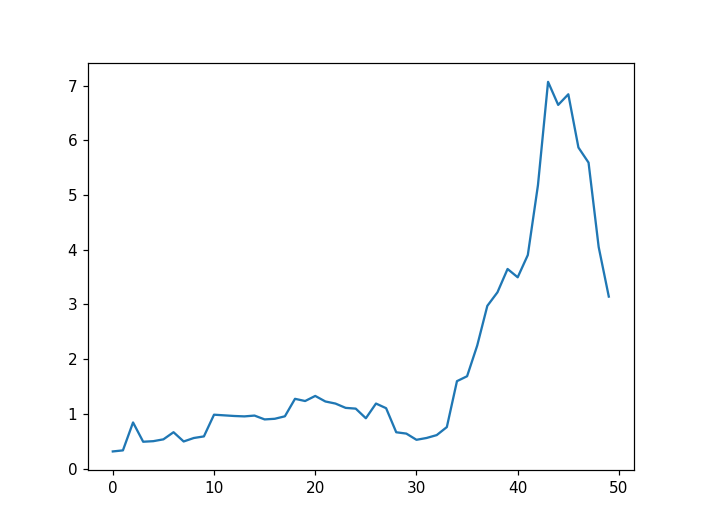

In [12]:
ms2.train_minib(X_TR,Y_TR,bsize=2048,bloop=8,loop=500)

In [8]:
X_TR.shape,ms2.X.shape

((6931, 50, 50, 15),
 TensorShape([Dimension(None), Dimension(10), Dimension(19), Dimension(15)]))

In [41]:
tf.reset_default_graph()
m = model0s1()

In [42]:
m.open()
m.sess.run(tf.global_variables_initializer())

In [45]:
m.close()

<IPython.core.display.Javascript object>


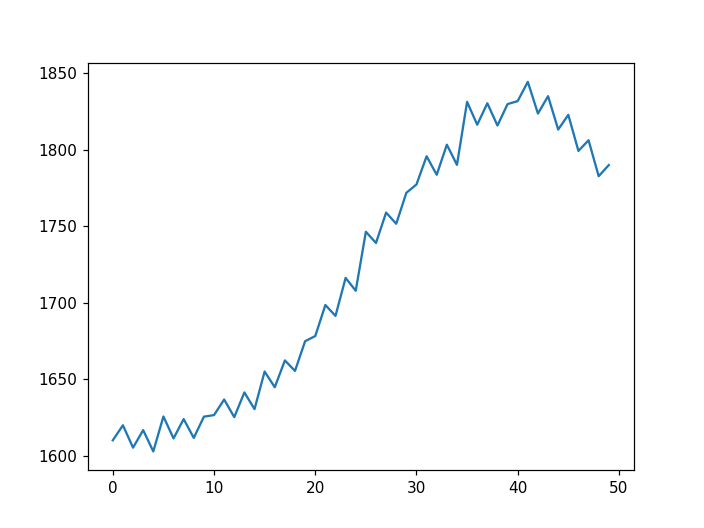

In [43]:
m.train_minib(X_TR,Y_TR,bsize=128,bloop=5,loop=400)

In [10]:
x1 = DataLoader(data_name = "MMM19_1_",mode = 'reg',p_day = 10,train_prob = 0.95)
dd1 = x1(p_type="all")
x2 = DataLoader(data_name = "RH19_1_",mode = 'reg',p_day = 10,train_prob = 0.8)
dd2 = x2(p_type="all")
X_TR = np.concatenate((dd1["X_tr"],dd2["X_tr"]))
Y_TR = np.concatenate((dd1["Y_tr"],dd2["Y_tr"]))

In [13]:
XX = dd2["X_te"]
YY = dd2["Y_te"]

In [14]:
yy=ms2.sess.run(ms2.OUP,feed_dict={ms2.X:XX})

In [15]:
(abs(yy[:,0] - YY[:,0])<0.025).sum()/(len(YY))

0.5864978902953587

In [16]:
yy.max(),yy.min(),len(yy)

(0.058840357, -0.049891353, 237)

In [18]:
YY.max(),YY.min(),len(YY)

(0.19538670284938947, -0.28736517719568572, 237)

In [21]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [23]:
get_available_gpus()

['/gpu:0']

In [35]:
4//3

1